In [203]:
import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split
from importlib import reload

In [204]:
from Kmedoids import kMedoids
from helper_functions import pairwise_distance, nLCS
from score_distance import distance_k_neighbor, distance_clusters

import matplotlib.pyplot as plt

# Importing the data

We creat two data sets: one with dog genes from family 0, the other from family 1. We will train on family 0 and test on a mix of family 0 and 1 (the goal will be to find the outliers from family 1).

In [210]:
df_dog = pd.read_csv('data\dog_data.txt', delimiter= '\t')

In [211]:
df_dog

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0
...,...,...
815,ATGGTCGGTCCGGAGAAGGAGCAGAGCTGGATCCCTAAGATCTTCA...,5
816,ATGGCGGCGACGGTGGCTGCGGCGGCCGCCGACGCGGGGCCGGGGG...,6
817,ATGAGCTCGGCCGACAAGGCCCGGGTGGGGCCCGCGGCCGACGGGC...,6
818,GCCCCGAGGATGGGCAGGGTCCCGCTGGCCTGGTGCTTGGCGCTGT...,1


In [212]:
dog_0= df_dog[df_dog["class"]== 0]
dog_0

,sequence,class
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0
6,ATGACGTCCACCTGCCCCAATAACACCAGGGAGAGCAACAGCAGCC...,0
7,ATGGCCAACTCCACAGGGCTGACCACCTCGGAAGTCGTGGGCTCGG...,0
8,ATGGCGAACTATAGCCATGCAGCTGACAACATTTTACAAAATCTTT...,0
9,ATGACCACTCCTCACAATCAAGCTCAACCTGGCCCTTCCAACAATT...,0
...,...,...
785,ATTCTGAGTAACAACAAAATATCCGAGCTGAAGAATGGCTCATTTT...,0
786,ATGGAGAGTAACCTGTCTGGCCTGGTGCCTGCTGCTGGGCTGGTGC...,0
787,CTCAGAGTGCGGGGCCCAGGGCCCAGGCAGGCTGCCTGTGCCTCTC...,0
798,ATGTTTCAATATGAAGAAAGCAATGTTACTCAGAATCAAAATATGG...,0


In [213]:
dog_1= df_dog[df_dog["class"]== 6]
dog_1

,sequence,class
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
5,ATGGAGGAGGGCTCCAGCTCGCCCGTGTCCCCCGTGGACAGCCTGG...,6
11,ATGAATTCTGATTCGAGCTCTGTCTCCAGCAGAGCTTCATCGCCGG...,6
12,ATGTCCCGCCTGCTGCACGCAGAGGAGTGGGCTGAAGTGAAGGAGT...,6
...,...,...
811,ATGGGGGAACCCCGGGCTGGGGCCCCCCTGGACGATGGCAGTGGCT...,6
812,ATGGGGGAACCCCGGGCTGGGGCCCCCCTGGACGATGGCAGTGGCT...,6
816,ATGGCGGCGACGGTGGCTGCGGCGGCCGCCGACGCGGGGCCGGGGG...,6
817,ATGAGCTCGGCCGACAAGGCCCGGGTGGGGCCCGCGGCCGACGGGC...,6


In [214]:
dog_0_np = dog_0["sequence"].to_numpy()
dog_1_np = dog_1["sequence"].to_numpy()

In [215]:
np.unique(dog_0_np).shape, dog_0_np.shape

((131,), (131,))

In [216]:
np.unique(dog_1_np).shape, dog_1_np.shape

((259,), (260,))

In [217]:
dog_1_np = np.unique(dog_1_np)

Generating a train and test dataset from the 0 class. Also we select 20 abnormal elements from class 1.

In [221]:
train, test_normal = train_test_split(dog_0_np, test_size = 0.2, shuffle = True, random_state = 0)

In [222]:
test_normal.shape, train.shape

((27,), (104,))

In [224]:
np.random.seed(0)
np.random.shuffle(dog_1_np)
test_abnormal = dog_1_np[:20]
test_abnormal.shape

(20,)

# Applying Makov based methods

In [225]:
import markov_chain
markov_chain = reload(markov_chain)
from markov_chain import compute_markov_chain, compute_probability

In [226]:
A

array(['C', 'G', 'T', 'A', 'N'], dtype='<U1')

In [227]:
Q, P = compute_markov_chain(A, train)

In [228]:
np.sum(Q), np.sum(P, axis = 0)

(1.0, array([1., 1., 1., 1., 1.]))

In [73]:
P[:, 1]

array([0.29642817, 0.29133091, 0.18190847, 0.22978899, 0.        ])

In [230]:
test_normal[0][:3]

'ATG'

In [231]:
Q[3]*P[2,3]*P[1,2]

array([0.01727572])

In [232]:
test_normal.shape, A.shape, Q.shape

((27,), (5,), (5, 1))

In [233]:
prob_normal = compute_probability(test_normal, A, Q, P)

In [234]:
# Observe that the probabilities are all 0
prob_normal

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [235]:
prob_abnormal = compute_probability(test_abnormal, A, Q, P)
prob_abnormal

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 3.17631669e-314, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000])

# Applying window based method

In [284]:
def compute_window_prob(X_test, n, A ,Q, P):
    final_score = []
    for sequence in X_test:
        score = 0
        j = 0
        for i in range(0, len(sequence)-n):
            #print(np.array([sequence[i:i+n]]), len(sequence[i:i+n]))
            score += compute_probability(np.array([sequence[i:i+n]]), A, Q, P)
            j +=1
        
        final_score.append(score[0]/j)
    return np.array(final_score)
            
        

In [285]:
scores_normal = compute_window_prob(test_normal, 50, A, Q, P)

In [286]:
scores_abnormal = compute_window_prob(test_abnormal, 50, A, Q, P)

In [287]:
scores_normal.shape, scores_abnormal.shape

((27,), (20,))

In [288]:
# Computing all the scores:
labels = np.zeros(scores_normal.shape[0]+ scores_abnormal.shape[0])
labels[scores_normal.shape[0]: ] = 1
scores = np.hstack((scores_normal, scores_abnormal))
scores = np.vstack((scores, labels)).T

In [289]:
scores_sorted = scores[scores[:, 0].argsort()]

In [290]:
scores_sorted

array([[1.61048278e-30, 0.00000000e+00],
       [1.78107084e-30, 1.00000000e+00],
       [1.98250266e-30, 1.00000000e+00],
       [2.75617758e-30, 1.00000000e+00],
       [3.20806655e-30, 1.00000000e+00],
       [4.00941205e-30, 0.00000000e+00],
       [4.48021227e-30, 0.00000000e+00],
       [4.77608016e-30, 0.00000000e+00],
       [4.97828994e-30, 1.00000000e+00],
       [5.45760859e-30, 1.00000000e+00],
       [5.51604361e-30, 0.00000000e+00],
       [6.12692601e-30, 0.00000000e+00],
       [6.18323784e-30, 1.00000000e+00],
       [7.25819374e-30, 0.00000000e+00],
       [7.31477794e-30, 0.00000000e+00],
       [7.70027315e-30, 1.00000000e+00],
       [7.89108624e-30, 1.00000000e+00],
       [9.00712710e-30, 0.00000000e+00],
       [9.47530516e-30, 0.00000000e+00],
       [1.12806827e-29, 1.00000000e+00],
       [1.22214079e-29, 0.00000000e+00],
       [1.22473849e-29, 1.00000000e+00],
       [1.30399080e-29, 0.00000000e+00],
       [1.46112673e-29, 0.00000000e+00],
       [1.468436

In [291]:
np.where(scores[:,  1] == 0)[0].shape

(27,)

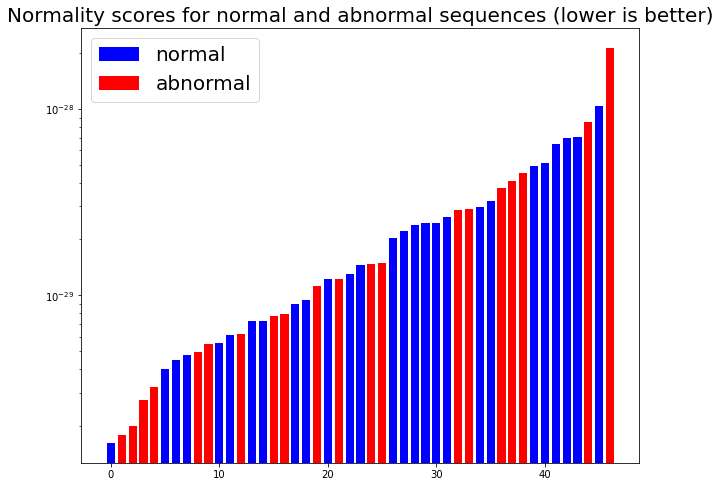

In [292]:

plt.figure(figsize = (10,8))

for i in range(scores.shape[0]):
    if scores_sorted[i, 1] == 0:
        c = "blue"
        label = "normal"
    else:
        c = "red"
        label = "abnormal"
    plt.bar(i, scores_sorted[i, 0], color = c, label = label, width = 0.75)
plt.legend(prop={'size': 20})
plt.title("Normality scores for normal and abnormal sequences (lower is better)", size = 20)
plt.yscale("log")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={'size': 20})

In [295]:
ab = np.where(scores_sorted[:scores_abnormal.shape[0]] == 1)[0].shape[0]

print("The number of abnormalities found is {}".format(ab))

The number of abnormalities found is 10


# Apply markov with large memory

In [298]:
from itertools import permutations, combinations_with_replacement

In [311]:
import markov_chain
markov_chain = reload(markov_chain)
from markov_chain import compute_markov_chain_multi, compute_probability_multi

In [327]:
def compute_window_prob_multi(X_test, n, A, a,Q, P):
    final_score = []
    for sequence in X_test:
        score = 0
        j = 0
        for i in range(0, len(sequence)-n):
            #print(np.array([sequence[i:i+n]]), len(sequence[i:i+n]))
            score += compute_probability_multi(np.array([sequence[i:i+n]]), A, a, Q, P)
            j +=1
        
        final_score.append(score[0]/j)
    return np.array(final_score)
            
        

In [342]:
letters = 'CGTAN'

In [343]:
comb = list(combinations_with_replacement(letters, 5))
A = []
temp = []
for element in comb:
    temp.append(''.join(element))
for letter in temp:
    for p in permutations(letter):
        A.append(''.join(p))
        
A = np.unique(np.array(A))

In [344]:
A.shape, 5**4

((3125,), 625)

In [345]:
alphabet = np.array(list(letters))
alphabet

array(['C', 'G', 'T', 'A', 'N'], dtype='<U1')

In [346]:
Q, P = compute_markov_chain_multi(A, alphabet, train)

In [347]:
np.sum(Q), np.sum(P, axis = 0)

(1.0, array([1., 1., 1., ..., 1., 0., 1.]))

In [322]:
1/625

0.0016

In [348]:
P[np.where(P == 0)] = 1e-5

In [349]:
prob_normal = compute_probability_multi(test_normal, A, alphabet, Q, P)
prob_abnormal = compute_probability_multi(test_abnormal, A, alphabet, Q, P)

In [350]:
prob_normal, prob_abnormal

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 2.65917698e-303, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000]))

In [360]:
scores_normal = compute_window_prob_multi(test_normal, 20, A, alphabet, Q, P)

In [361]:
scores_normal

array([9.86182857e-12, 2.91536182e-12, 1.32700479e-11, 5.27061404e-12,
       5.04780405e-12, 4.92148352e-12, 2.67754013e-11, 1.06260112e-11,
       8.98102585e-12, 2.61884961e-11, 3.17761855e-12, 9.26252705e-12,
       6.11687602e-12, 2.34679853e-11, 1.96416149e-12, 7.08322437e-12,
       7.12476792e-12, 1.29502221e-11, 2.01715481e-11, 6.27418752e-12,
       3.37109502e-12, 3.45636557e-12, 1.72673002e-11, 3.42395405e-12,
       2.86326594e-12, 1.51767372e-11, 1.23355747e-11])

In [362]:
scores_abnormal = compute_window_prob_multi(test_abnormal, 20, A, alphabet, Q, P)

In [363]:
scores_abnormal

array([8.84889855e-12, 2.18720830e-12, 3.15340798e-12, 6.40925294e-12,
       1.65021598e-12, 1.64108467e-11, 1.41783133e-11, 4.00234371e-12,
       5.18087218e-12, 3.33882393e-12, 9.64007794e-12, 4.32108772e-11,
       8.19994479e-12, 1.02415711e-11, 8.15748491e-12, 1.23829094e-11,
       4.62876618e-12, 7.14861952e-12, 2.41792029e-12, 5.10160805e-12])

In [364]:
# Computing all the scores:
labels = np.zeros(scores_normal.shape[0]+ scores_abnormal.shape[0])
labels[scores_normal.shape[0]: ] = 1
scores = np.hstack((scores_normal, scores_abnormal))
scores = np.vstack((scores, labels)).T

In [365]:
scores_sorted = scores[scores[:, 0].argsort()]

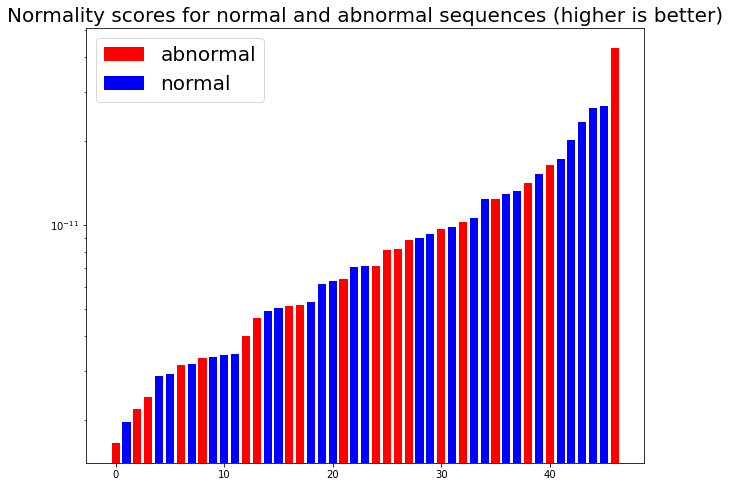

In [366]:

plt.figure(figsize = (10,8))

for i in range(scores.shape[0]):
    if scores_sorted[i, 1] == 0:
        c = "blue"
        label = "normal"
    else:
        c = "red"
        label = "abnormal"
    plt.bar(i, scores_sorted[i, 0], color = c, label = label, width = 0.75)
plt.legend(prop={'size': 20})
plt.title("Normality scores for normal and abnormal sequences (higher is better)", size = 20)
plt.yscale("log")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={'size': 20})

In [368]:
ab = np.where(scores_sorted[:scores_abnormal.shape[0]] == 1)[0].shape[0]

print("The number of abnormalities found is {}".format(ab))

The number of abnormalities found is 9


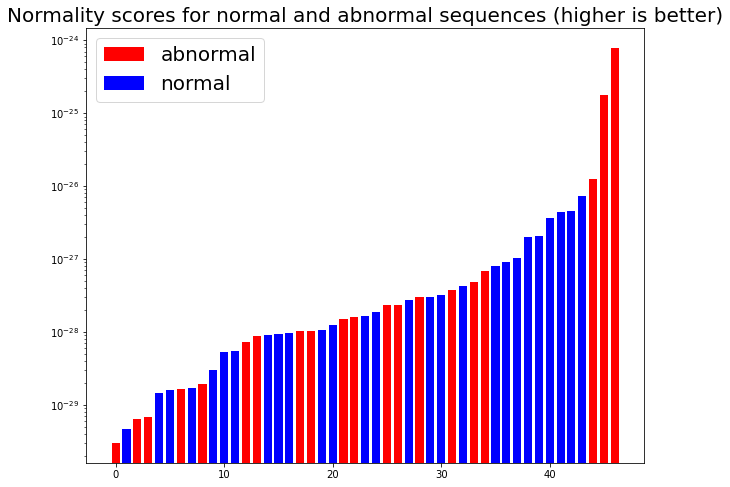

In [359]:

plt.figure(figsize = (10,8))

for i in range(scores.shape[0]):
    if scores_sorted[i, 1] == 0:
        c = "blue"
        label = "normal"
    else:
        c = "red"
        label = "abnormal"
    plt.bar(i, scores_sorted[i, 0], color = c, label = label, width = 0.75)
plt.legend(prop={'size': 20})
plt.title("Normality scores for normal and abnormal sequences (higher is better)", size = 20)
plt.yscale("log")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={'size': 20})

In [358]:
ab = np.where(scores_sorted[:scores_abnormal.shape[0]] == 1)[0].shape[0]

print("The number of abnormalities found is {}".format(ab))

The number of abnormalities found is 9


# Apply markov with large memory

In [369]:
from itertools import permutations, combinations_with_replacement

In [370]:
import markov_chain
markov_chain = reload(markov_chain)
from markov_chain import compute_markov_chain_multi, compute_probability_multi

In [371]:
def compute_window_prob_multi(X_test, n, A, a,Q, P):
    final_score = []
    for sequence in X_test:
        score = 0
        j = 0
        for i in range(0, len(sequence)-n):
            #print(np.array([sequence[i:i+n]]), len(sequence[i:i+n]))
            score += compute_probability_multi(np.array([sequence[i:i+n]]), A, a, Q, P)
            j +=1
        
        final_score.append(score[0]/j)
    return np.array(final_score)
            
        

In [372]:
letters = 'CGTAN'

In [373]:
comb = list(combinations_with_replacement(letters, 6))
A = []
temp = []
for element in comb:
    temp.append(''.join(element))
for letter in temp:
    for p in permutations(letter):
        A.append(''.join(p))
        
A = np.unique(np.array(A))

In [375]:
A.shape, 6**4

((15625,), 1296)

In [376]:
alphabet = np.array(list(letters))
alphabet

array(['C', 'G', 'T', 'A', 'N'], dtype='<U1')

In [377]:
Q, P = compute_markov_chain_multi(A, alphabet, train)

In [378]:
np.sum(Q), np.sum(P, axis = 0)

(1.0, array([1., 1., 1., ..., 1., 0., 1.]))

In [379]:
1/625

0.0016

In [380]:
P[np.where(P == 0)] = 1e-5

In [381]:
prob_normal = compute_probability_multi(test_normal, A, alphabet, Q, P)
prob_abnormal = compute_probability_multi(test_abnormal, A, alphabet, Q, P)

In [382]:
prob_normal, prob_abnormal

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 3.92380555e-310, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000]))

In [383]:
scores_normal = compute_window_prob_multi(test_normal, 20, A, alphabet, Q, P)

In [384]:
scores_normal

array([1.27307478e-11, 3.31100892e-12, 2.08266707e-11, 7.65765812e-12,
       7.87406643e-12, 6.12056885e-12, 1.08104234e-10, 2.02456189e-11,
       1.55503757e-11, 6.76024236e-11, 4.45560011e-12, 1.60060064e-11,
       8.67168566e-12, 3.82927106e-11, 1.90545578e-12, 1.56624790e-11,
       1.13911813e-11, 2.11390038e-11, 3.59824054e-11, 8.55495182e-12,
       4.26094062e-12, 7.14971148e-12, 3.29009856e-11, 3.93641273e-12,
       2.96801607e-12, 2.91344649e-11, 2.18269985e-11])

In [385]:
scores_abnormal = compute_window_prob_multi(test_abnormal, 20, A, alphabet, Q, P)

In [386]:
scores_abnormal

array([1.22006750e-11, 2.65512730e-12, 3.50075222e-12, 1.51649792e-11,
       2.25863619e-12, 1.18819372e-10, 1.98284660e-11, 9.03066098e-12,
       7.31018029e-12, 3.70888366e-12, 1.62164251e-11, 5.58715899e-10,
       1.28862716e-11, 2.08328387e-11, 1.24379532e-11, 3.95253146e-11,
       5.38974484e-12, 5.06867114e-12, 2.85384194e-12, 7.82475311e-12])

In [387]:
# Computing all the scores:
labels = np.zeros(scores_normal.shape[0]+ scores_abnormal.shape[0])
labels[scores_normal.shape[0]: ] = 1
scores = np.hstack((scores_normal, scores_abnormal))
scores = np.vstack((scores, labels)).T

In [388]:
scores_sorted = scores[scores[:, 0].argsort()]

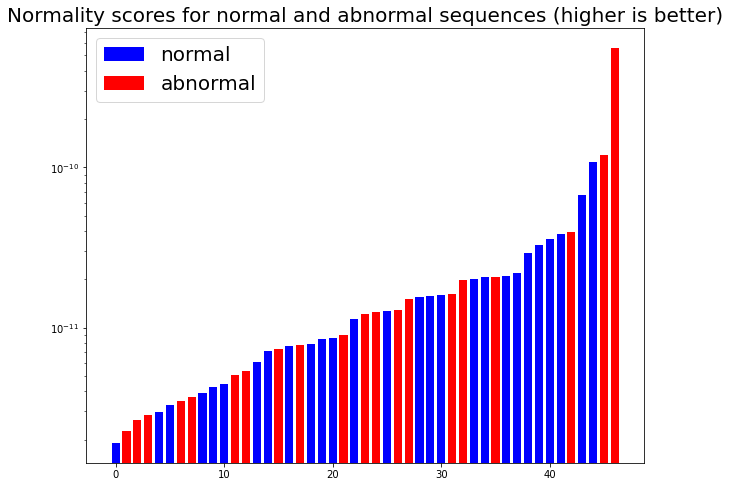

In [389]:

plt.figure(figsize = (10,8))

for i in range(scores.shape[0]):
    if scores_sorted[i, 1] == 0:
        c = "blue"
        label = "normal"
    else:
        c = "red"
        label = "abnormal"
    plt.bar(i, scores_sorted[i, 0], color = c, label = label, width = 0.75)
plt.legend(prop={'size': 20})
plt.title("Normality scores for normal and abnormal sequences (higher is better)", size = 20)
plt.yscale("log")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={'size': 20})

In [390]:
ab = np.where(scores_sorted[:scores_abnormal.shape[0]] == 1)[0].shape[0]

print("The number of abnormalities found is {}".format(ab))

The number of abnormalities found is 9
